In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import pymorphy3
import gensim.downloader as api
from gensim.models import Word2Vec

ModuleNotFoundError: No module named 'gensim'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = stopwords.words('russian')
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train = pd.read_csv('/home/devyati/Семинары по обработке языка/log_regressiya_primerno_0_73/sad/sad/train.csv')
test = pd.read_csv('/home/devyati/Семинары по обработке языка/log_regressiya_primerno_0_73/sad/sad/test.csv')

In [ ]:
train['class'].value_counts()

,count
class,
1,92063
0,89404


<Axes: xlabel='class', ylabel='count'>

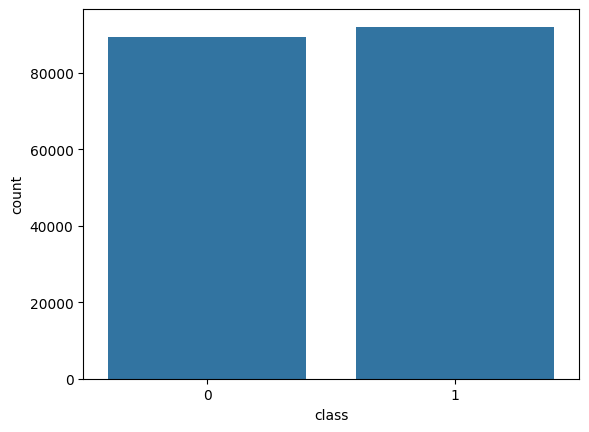

In [ ]:
sns.countplot(x = "class", data = train)

In [ ]:
train

,id,text,class
0,0,@alisachachka не уезжаааааааай. :(❤ я тоже не ...,0
1,1,RT @GalyginVadim: Ребята и девчата!\nВсе в кин...,1
2,2,RT @ARTEM_KLYUSHIN: Кто ненавидит пробки ретви...,0
3,3,RT @epupybobv: Хочется котлету по-киевски. Зап...,1
4,4,@KarineKurganova @Yess__Boss босапопа есбоса н...,1
...,...,...,...
181462,181462,Классным будет новый год..( http://t.co/LejaGu...,0
181463,181463,Видишь человека хочешь сказать ему привет . А ...,0
181464,181464,@Julia6_9Styles там длинный диагноз. Вкратце: ...,0
181465,181465,"@technoslav ух ты, а кому тот серенький кнопоч...",1


## Базовая предварительная обработка текста

Этапы предварительной обработки текста включают несколько основных задач для дальнейшей очистки имеющихся текстовых данных. Они включают такие задачи, как:-

1. **Удаление стоп-слов**: в английском языке такие слова, как a, an, the, as, in, on и т. д. считаются стоп-словами, поэтому в соответствии с нашими требованиями мы можем удалить их, чтобы сократить размер словарного запаса, поскольку эти слова не имеют определенного значения.

2. **Нижний регистр:** преобразуем все слова в нижний регистр, поскольку верхний или нижний регистр может не иметь значения для проблемы. И мы уменьшаем размер словарного запаса, делая это.

3. **Стемминг:** Стемминг относится к процессу удаления суффиксов и приведения слова к некоторой базовой форме таким образом, чтобы все различные варианты этого слова могли быть представлены одной и той же формой (например, «walk» и «walking» оба приводятся к «walk»).

4. **Токенизация:** программное обеспечение NLP обычно анализирует текст, разбивая его на слова (токены) и предложения.

In [ ]:
stop_words = set(stopwords.words('russian'))
morph = pymorphy3.MorphAnalyzer()

def preproc_nltk(text):
    tokens = word_tokenize(text.lower())

    lemmatized_tokens = [
        morph.parse(word)[0].normal_form
        for word in tokens
        if word.isalnum()
        and word.isalpha()
        and word not in stop_words
        and not word.startswith('@')]

    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

# Мешок слов

In [ ]:
bow_vectorizer = CountVectorizer(
    preprocessor=preproc_nltk,
    min_df=50,
    max_df=10000,
    binary=False)

bow_vectors = bow_vectorizer.fit_transform(train['text'][:40000])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow_vectors, train['class'][:40000], test_size=0.2, random_state=42)
X_train.shape

(32000, 800)

In [ ]:
nb = BernoulliNB(binarize=True)
nb.fit(X_train, y_train)

BernoulliNB(binarize=True)

In [ ]:
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.507125


In [ ]:
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.677875


# TF-IDF

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/devyati/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Фильтруем лишь те токены, что присутствую минимум в 100 и максимум в 5000 строках
# с целью отфильтровать малоинформативные слова
vectorizer = TfidfVectorizer(preprocessor=preproc_nltk, min_df=50, max_df=10000)
vectors = vectorizer.fit_transform(train['text'][:40000])

In [ ]:
vectorizer.get_feature_names_out()[::10]

array(['dd', 'аааа', 'ахахах', 'бесить', 'больница', 'быстро',
       'вернуться', 'вид', 'возможно', 'вспомнить', 'вы', 'глаз',
       'готовить', 'давно', 'декабрь', 'добрый', 'др', 'ехать', 'жесть',
       'забыть', 'заставить', 'знакомый', 'идти', 'испортить', 'катя',
       'комп', 'красиво', 'купить', 'лицо', 'магазин', 'метро', 'молчать',
       'мысль', 'напомнить', 'начать', 'немой', 'новогодний', 'ночь',
       'общий', 'окно', 'оставаться', 'отлично', 'ощущение', 'петь',
       'плакать', 'погулять', 'поздно', 'полный', 'понимать', 'последний',
       'почему', 'прекрасный', 'приходить', 'пропустить', 'прошлый',
       'рабочий', 'разный', 'ретвит', 'рядом', 'сделать', 'серия',
       'сколько', 'слово', 'смотреть', 'сожаление', 'спина', 'стать',
       'странный', 'считать', 'твой', 'тренировка', 'увидеть', 'уйти',
       'урок', 'учить', 'фраза', 'хотеть', 'час', 'что', 'шутка'],
      dtype=object)

In [ ]:
dense_vectors = vectors.todense()
dense_vectors.shape

(40000, 800)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(dense_vectors, train['class'][:40000], test_size=0.2, random_state=0)
y_train.shape, y_test.shape

((32000,), (8000,))

In [ ]:
# Обучаем наивный Байес
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.684125


In [ ]:
# Обучаем логистическую регрессию
clf = LogisticRegression(max_iter=500)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.682


## TF-IDF (N-грамм)

In [ ]:
vectorizer = TfidfVectorizer(preprocessor=preproc_nltk,
                             min_df=50,
                             max_df=10000,
                             ngram_range=(1, 2),
                             binary=True)
vectors = vectorizer.fit_transform(train['text'][:40000])

In [ ]:
vectors = vectorizer.fit_transform(train['text'][:40000])
dense_vectors = vectors.todense()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    dense_vectors,
    train['class'][:40000],
    test_size=0.2,
    random_state=0)

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

nb = BernoulliNB()
nb.fit(X_train, y_train)

BernoulliNB()

In [ ]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6835


In [ ]:
clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6815


## Использование эмбеддингов
#### Oбучение модели на основе самого текста

In [ ]:
proc_words = [preproc_nltk(text).split() for text in tqdm(train['text'][:40000], desc="Tokenizing")]

Tokenizing: 100%|███████████████████████| 40000/40000 [00:26<00:00, 1485.13it/s]


In [ ]:
model = Word2Vec(
    sentences=proc_words,
    vector_size=60,
    window=3,
    min_count=50,
    workers=4,
    epochs=10)

In [ ]:
vector = model.wv['слово']

In [ ]:
def vectorize_sum(comment, embeddings, max_length=60):
    embedding_dim = embeddings.vector_size
    features = np.zeros([max_length, embedding_dim], dtype='float32')
    words = preproc_nltk(comment).split()[:max_length]

    for i, word in enumerate(words):
        if word in embeddings.wv:
            features[i] = embeddings.wv[word]

    return features

In [ ]:
X_wv = np.stack([vectorize_sum(text, model) for text in train['text'][:40000]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_wv, train['class'][:40000], test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(28000, 60, 60)

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
clf.fit(X_train_flattened, y_train[:40000])

/home/devyati/miniconda3/envs/nlp_1/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test_flattened)
accuracy = accuracy_score(y_test[:40000], y_pred)
print(accuracy)

0.6734166666666667


### Word2Vec.

In [ ]:
from gensim import downloader as api

In [ ]:
embeddings_pretrained = api.load('word2vec-ruscorpora-300')

In [ ]:
word2vec_model = Word2Vec(proc_words, vector_size=60, window=3, workers=4)

In [ ]:
X_train_w2v = np.array([vectorize_sum(text, word2vec_model) for text in train['text'][:40000]])
y_train = train['class'][:40000]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_w2v, y_train[:40000], test_size=0.3, random_state=42)

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
clf.fit(X_train_flattened, y_train)

In [ ]:
y_pred = clf.predict(X_test_flattened)
accuracy = accuracy_score(y_test[:40000], y_pred)
print(accuracy)

## Обучение трансформера

In [ ]:
import torch
import re
import string
from nltk.tokenize import word_tokenize
from pymorphy3 import MorphAnalyzer
from stop_words import get_stop_words
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize as PUNCT_WORD_TOKENIZER
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import torch.nn as nn
from tqdm import tqdm
import math
import nltk

In [ ]:
MAX_LEN = 40
EMBED_DIM = 256
NHEAD = 8
FFN_HID_DIM = 256
NUM_LAYERS = 8
BATCH_SIZE = 16
EPOCHS = 15
LR = 1e-4
num_classes = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
morph = MorphAnalyzer()
RUSSIAN_STOP_WORDS = set(get_stop_words('ru'))

def preprocess_text(text):
    if not isinstance(text, str):
        text = ""

    text = re.sub(r'@\w+\b', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'[^а-яё\s]', ' ', text, flags=re.IGNORECASE)
    text = re.sub(r'\s+', ' ', text).strip()

    tokens = word_tokenize(text, language='russian')
    lemmas = [
        morph.parse(t)[0].normal_form for t in tokens
        if t not in RUSSIAN_STOP_WORDS and len(t) >= 2
    ]

    return ' '.join(lemmas)

def build_vocab(texts, min_df=2):
    vectorizer = CountVectorizer(
        min_df=min_df,
        tokenizer=lambda x: x.split(),
        token_pattern=None
    )
    vectorizer.fit(texts)
    vocab = {word: idx+2 for idx, word in enumerate(vectorizer.get_feature_names_out())}
    vocab['<pad>'] = 0
    vocab['<unk>'] = 1
    return vocab

In [ ]:
class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout, device):
        super().__init__()

        assert hid_dim % n_heads == 0

        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads

        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        self.fc_o = nn.Linear(hid_dim, hid_dim)

        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)

    def forward(self, query, key, value, attn_mask=None, key_padding_mask=None):
        batch_size = query.shape[0]

        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)

        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)

        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale

        if key_padding_mask is not None:
            energy = energy.masked_fill(key_padding_mask.unsqueeze(1).unsqueeze(2), -1e10)

        attention = torch.softmax(energy, dim=-1)
        x = torch.matmul(self.dropout(attention), V)

        x = x.permute(0, 2, 1, 3).contiguous()
        x = x.view(batch_size, -1, self.hid_dim)
        x = self.fc_o(x)

        return x, attention

In [ ]:
class CommentDataset(Dataset):
    def __init__(self, df, vocab, max_len):
        self.df = df
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        raw_text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['class']
        tokens = raw_text.split()
        token_ids = [self.vocab.get(t, self.vocab['<unk>']) for t in tokens[:self.max_len]]

        if len(token_ids) < self.max_len:
            token_ids += [self.vocab['<pad>']] * (self.max_len - len(token_ids))
        else:
            token_ids = token_ids[:self.max_len]

        return {
            'input_ids': torch.tensor(token_ids, dtype = torch.long),
            'labels':  torch.tensor(label, dtype = torch.long)}

In [ ]:
class EncoderBlock(nn.Module):
    def __init__(self, emb_size, nhead, dim_feedforward=128, dropout=0.2):
        super().__init__()
        self.self_attn = MultiHeadAttentionLayer(emb_size, nhead, dropout=dropout, device=device)
        self.linear1 = nn.Linear(emb_size, dim_feedforward)
        self.linear2 = nn.Linear(dim_feedforward, emb_size)
        self.norm1 = nn.LayerNorm(emb_size)
        self.norm2 = nn.LayerNorm(emb_size)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.activation = nn.ReLU()

    def forward(self, src, src_mask=None):
        src2, _ = self.self_attn(src, src, src, attn_mask=src_mask)
        src = src + self.dropout1(src2)
        src = self.norm1(src)

        src2 = self.linear2(self.dropout2(self.activation(self.linear1(src))))
        src = src + self.dropout2(src2)
        src = self.norm2(src)

        return src

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, emb_size, max_len):
        super().__init__()
        pe = torch.zeros(max_len, emb_size)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, emb_size, 2).float() * (-math.log(10000.0) / emb_size))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [ ]:
class TextTransformer(nn.Module):
    def __init__(self, num_classes, vocab_size, emb_size=EMBED_DIM, nhead=NHEAD,
                 num_layers=NUM_LAYERS, dim_feedforward=FFN_HID_DIM, dropout=0.2):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.pos_encoder = PositionalEncoding(emb_size, max_len=MAX_LEN)

        self.layers = nn.ModuleList([
            EncoderBlock(emb_size, nhead, dim_feedforward, dropout)
            for _ in range(num_layers)
        ])

        self.classifier = nn.Linear(emb_size, num_classes)

    def forward(self, src):
        src = self.embedding(src)
        src = self.pos_encoder(src)

        for layer in self.layers:
            src = layer(src)

        output = src.mean(dim=1)
        return self.classifier(output)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
train = pd.read_csv('train.csv')[:40000]

vocab = build_vocab(train['text'])
VOCAB_SIZE = len(vocab)
idx_to_token = {i: token for token, i in vocab.items()}


dataset = CommentDataset(train, vocab, MAX_LEN)
train_data, val_data = train_test_split(dataset, test_size=0.1)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
model = TextTransformer(
    num_classes=num_classes,
    vocab_size=VOCAB_SIZE,
    emb_size=EMBED_DIM,
    nhead=NHEAD,
    num_layers=NUM_LAYERS,
    dim_feedforward=FFN_HID_DIM
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [ ]:
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]"):
        input_ids = batch['input_ids'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (torch.argmax(outputs, dim=1) == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total

    model.eval()
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]"):
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids)
            predicted = torch.argmax(outputs, dim=1)

            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total if val_total > 0 else 0

    print(f"Epoch {epoch+1}, "
          f"Loss: {total_loss/len(train_loader):.4f}, "
          f"Train Acc: {train_acc:.2f}%, "
          f"Val Acc: {val_acc:.2f}%")

Epoch 1 [Val]: 100%|██████████| 250/250 [00:01<00:00, 181.64it/s]


Epoch 1, Loss: 0.5282, Train Acc: 69.17%, Val Acc: 73.20%


Epoch 2 [Val]: 100%|██████████| 250/250 [00:01<00:00, 127.59it/s]


Epoch 2, Loss: 0.4519, Train Acc: 75.29%, Val Acc: 76.00%


Epoch 3 [Val]: 100%|██████████| 250/250 [00:01<00:00, 182.09it/s]


Epoch 3, Loss: 0.4154, Train Acc: 78.05%, Val Acc: 76.08%


Epoch 4 [Val]: 100%|██████████| 250/250 [00:01<00:00, 183.47it/s]


Epoch 4, Loss: 0.3735, Train Acc: 81.22%, Val Acc: 77.20%


Epoch 5 [Val]: 100%|██████████| 250/250 [00:01<00:00, 151.61it/s]


Epoch 5, Loss: 0.3323, Train Acc: 83.67%, Val Acc: 77.35%


Epoch 6 [Val]: 100%|██████████| 250/250 [00:01<00:00, 187.08it/s]


Epoch 6, Loss: 0.2847, Train Acc: 86.62%, Val Acc: 77.50%


Epoch 7 [Val]: 100%|██████████| 250/250 [00:01<00:00, 185.09it/s]


Epoch 7, Loss: 0.2421, Train Acc: 89.05%, Val Acc: 77.30%


Epoch 8 [Val]: 100%|██████████| 250/250 [00:01<00:00, 183.64it/s]


Epoch 8, Loss: 0.2037, Train Acc: 90.74%, Val Acc: 77.55%


Epoch 9 [Val]: 100%|██████████| 250/250 [00:01<00:00, 181.60it/s]


Epoch 9, Loss: 0.1741, Train Acc: 92.33%, Val Acc: 77.28%


Epoch 10 [Val]: 100%|██████████| 250/250 [00:01<00:00, 182.31it/s]


Epoch 10, Loss: 0.1478, Train Acc: 93.53%, Val Acc: 76.10%


Epoch 11 [Val]: 100%|██████████| 250/250 [00:01<00:00, 183.97it/s]


Epoch 11, Loss: 0.1282, Train Acc: 94.42%, Val Acc: 75.97%


Epoch 12 [Val]: 100%|██████████| 250/250 [00:01<00:00, 182.78it/s]


Epoch 12, Loss: 0.1110, Train Acc: 95.05%, Val Acc: 76.47%


Epoch 13 [Val]: 100%|██████████| 250/250 [00:01<00:00, 158.63it/s]


Epoch 13, Loss: 0.0993, Train Acc: 95.78%, Val Acc: 76.65%


Epoch 14 [Val]: 100%|██████████| 250/250 [00:01<00:00, 185.57it/s]


Epoch 14, Loss: 0.0890, Train Acc: 96.14%, Val Acc: 76.25%


Epoch 15 [Val]: 100%|██████████| 250/250 [00:01<00:00, 184.43it/s]

Epoch 15, Loss: 0.0836, Train Acc: 96.45%, Val Acc: 76.42%


In [ ]:
MODEL_SAVE_PATH = "transformer_model.pth"
torch.save(model.state_dict(), MODEL_SAVE_PATH)

In [ ]:
test = pd.read_csv('test.csv')[:50]
test['processed_text'] = test['text'].apply(preprocess_text)

class TestCommentDataset(Dataset):
    def __init__(self, df, vocab, max_len):
        self.df = df
        self.vocab = vocab
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        raw_text = self.df.iloc[idx]['processed_text']
        tokens = raw_text.split()
        token_ids = [self.vocab.get(t, self.vocab['<unk>']) for t in tokens[:self.max_len]]

        if len(token_ids) < self.max_len:
            token_ids += [self.vocab['<pad>']] * (self.max_len - len(token_ids))
        else:
            token_ids = token_ids[:self.max_len]

        return {
            'input_ids': torch.tensor(token_ids, dtype=torch.long),
            'index': self.df.iloc[idx].name,
            'original_text': self.df.iloc[idx]['original_text']
        }

test_dataset = TestCommentDataset(test, vocab, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

model.eval()
predictions = []
indices = []
original_texts = []

with torch.no_grad():
    for batch in tqdm(test_loader, desc="Making predictions"):
        input_ids = batch['input_ids'].to(device)
        batch_indices = batch['index'].cpu().numpy()
        batch_texts = batch['original_text']

        outputs = model(input_ids)
        predicted_classes = torch.argmax(outputs, dim=1).cpu().numpy()

        predictions.extend(predicted_classes)
        indices.extend(batch_indices)
        original_texts.extend(batch_texts)

submission_df = pd.DataFrame({'id': indices, 'original_text': original_texts, 'class': predictions})

submission_df.sort_values(by='id', inplace=True)
submission_df.to_excel('submission.xlsx', index=False)

## Предобученный BERT

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModel


MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 2
LR = 2e-5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

class BertDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

class BertClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.bert = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        pooled_output = outputs.last_hidden_state[:, 0, :]
        pooled_output = self.dropout(pooled_output)
        return self.classifier(pooled_output)

train_df = pd.read_csv('train.csv')[:5000]
texts = train_df['text'].values
labels = train_df['class'].values

train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.1, random_state=42
)

train_dataset = BertDataset(train_texts, train_labels, tokenizer, MAX_LEN)
val_dataset = BertDataset(val_texts, val_labels, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

model = BertClassifier().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (torch.argmax(outputs, dim=1) == labels).sum().item()
        total += labels.size(0)

    train_acc = 100 * correct / total

    model.eval()
    val_correct = 0
    val_total = 0
    val_loss = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask)
            val_loss += criterion(outputs, labels).item()
            val_correct += (torch.argmax(outputs, dim=1) == labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total if val_total > 0 else 0

    print(f"Epoch {epoch+1}")
    print(f"Train Loss: {total_loss/len(train_loader):.4f}, Accuracy: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss/len(val_loader):.4f}, Accuracy: {val_acc:.2f}%")

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Epoch 1: 100%|██████████| 282/282 [01:40<00:00,  2.79it/s]


Epoch 1
Train Loss: 0.0449, Accuracy: 98.20%
Val Loss: 0.0106, Accuracy: 99.80%
--------------------------


Epoch 2: 100%|██████████| 282/282 [01:41<00:00,  2.78it/s]


Epoch 2
Train Loss: 0.0032, Accuracy: 99.96%
Val Loss: 0.0001, Accuracy: 100.00%
--------------------------
